In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df_train=df.iloc[:,1:5]

In [4]:
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Figure size 720x720 with 0 Axes>

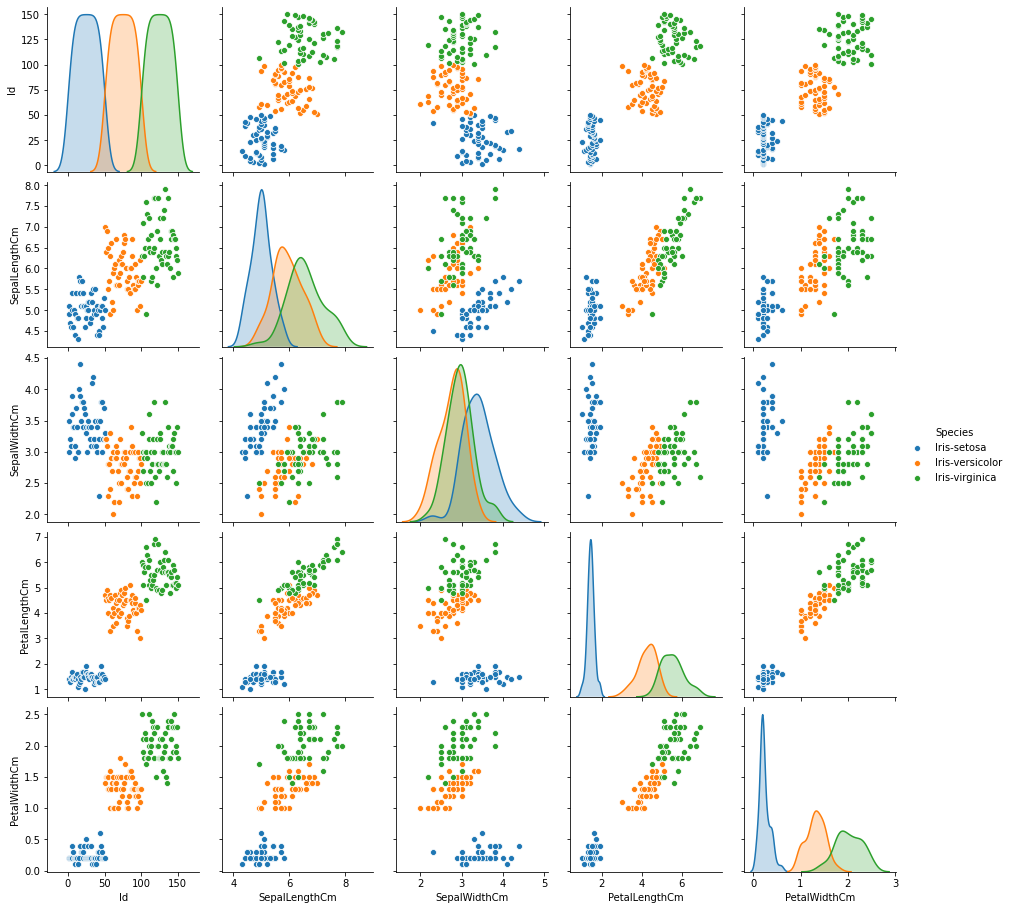

In [7]:
# Looking at the Pairplots
plt.figure(figsize=[10,10])
sns.pairplot(df,hue='Species')
plt.show()

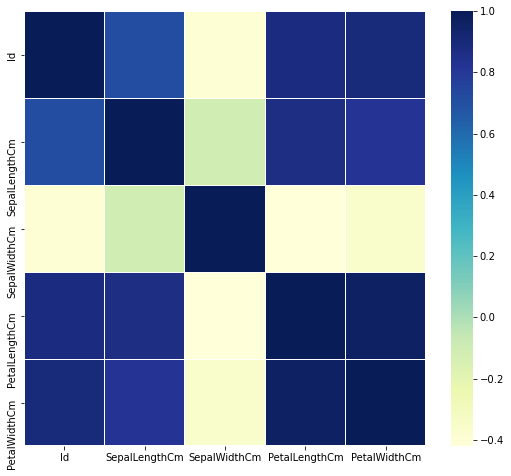

In [17]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

# Using Elbow Method to Calculate The Number of Clusters

We run the Cluster Analysis using Cluster as 1 till 12. We Store the WSS Scores. The WSS score will be used to create elbow plot

WSS= Within-Cluster-Sum of Squared

In [8]:
import sklearn.cluster as cluster

In [9]:
wss=[]
for k in range(1,10):
    kmeans=cluster.KMeans(n_clusters=k,init='k-means++')
    kmeans=kmeans.fit(df_train)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

In [10]:
k=[i for i in range(1,10)]
mycenters=pd.DataFrame({'Clusters':k,'WSS':wss})
mycenters

,Clusters,WSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.930963
6,7,34.204568
7,8,29.955569
8,9,27.839591


# Plot Elbow PLot

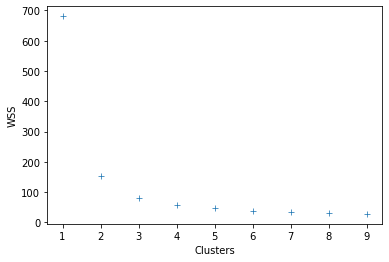

In [11]:
sns.scatterplot(x='Clusters',y='WSS',data=mycenters,marker="+")

From the above elbow plot we deduce the optimum number of clusters to be 3

# Silhouette Method to Identify Clusters

In [12]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [13]:
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init='k-means++',random_state=200).fit(df_train).labels_
    print('Silhouette score for k clusters='+str(i)+'is'+str(metrics.silhouette_score(df_train,labels,metric='euclidean',sample_size=1000,random_state=200)))

Silhouette score for k clusters=2is0.6808136202713507
Silhouette score for k clusters=3is0.5525919445213676
Silhouette score for k clusters=4is0.49722797262968016
Silhouette score for k clusters=5is0.48851755085386317
Silhouette score for k clusters=6is0.3665040147525055
Silhouette score for k clusters=7is0.3550005150724976
Silhouette score for k clusters=8is0.3528905239126014
Silhouette score for k clusters=9is0.3428231239210774


From the Silhouettte Scores and Elbow Plot ,we deduce the final opimum number of clusters to be 3                                                                                             

# Perform K mean Clustering with 5 Clusters

In [14]:
kmeans=cluster.KMeans(n_clusters=3,init='k-means++')
kmeans=kmeans.fit(df_train)

In [15]:
df_train['Clusters']=kmeans.labels_

<Figure size 720x720 with 0 Axes>

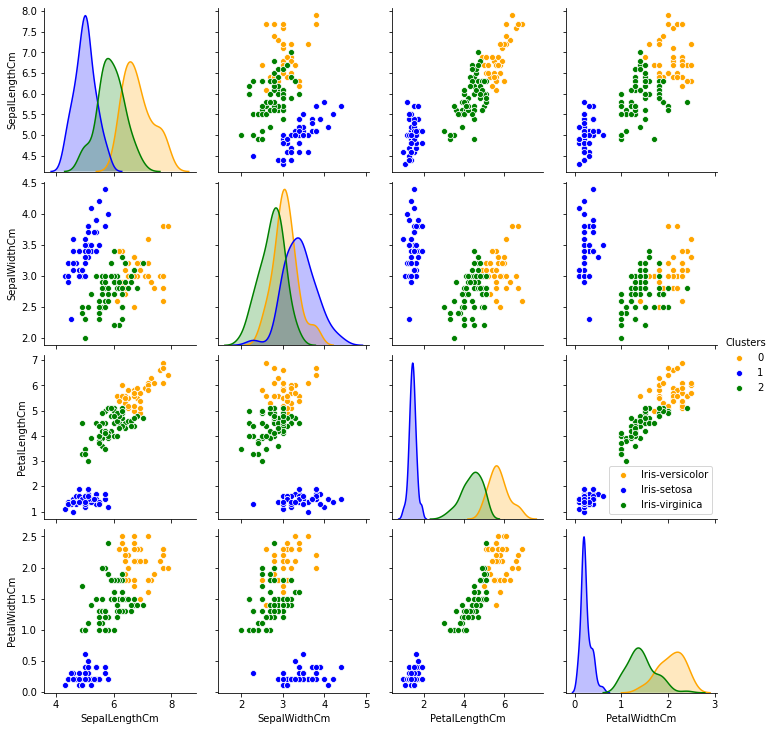

In [16]:
# Looking at the Pairplots
plt.figure(figsize=[10,10])
sns.pairplot(df_train,hue='Clusters',palette={1:'blue',0:'orange',2:'green'})
plt.legend(['Iris-versicolor','Iris-setosa','Iris-virginica'],loc='lower right')
plt.show()